# Comparative snalysis of regional data, by Pietro Terna$^1$ and Stefano Terna$^2$  
$^1$ Univerity of Torino, Italy (retired) & Fondazione Collegio Carlo Alberto, Italy  
$^2$ PhD, [tomorrowdata.io](https://tomorrowdata.io)

<br/>

# Definitions
**from the [Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione) web site [in square brakets my addenda]**,
     
**<span style="color: red;">Legenda</span>**  about stocks and flows:  
    - stock($t$), quantity of day $t$;  
    - flow$[t_1,t_2]$, sum of the quantities from day $t_1$ to day $t_2$,  
with $[t_1,t_2]=\{x \in \mathbb{R}|t_1 \leq x \leq t_2\}$

   
**ricoverati_con_sintomi <span style="color: red;">[stock(t)]</span>**  
Ricoverati con sintomi | Hospitalised patients with symptoms  

**terapia_intensiva <span style="color: red;">[stock(t)]</span>**  
Ricoverati in terapia intensiva	| Intensive Care  
  
**totale_ospedalizzati <span style="color: red;">[stock(t)]</span>**  
Totale ospedalizzati | Total hospitalised patients  
  
**isolamento_domiciliare <span style="color: red;">[stock(t)]</span>**  
Persone in isolamento domiciliare | Home confinement  
  
**totale_positivi <span style="color: red;">[stock(t)]</span>**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare) | Total amount of current positive cases (Hospitalised patients + Home confinement)  
  
**variazione_totale_positivi <span style="color: red;">[first difference of totale_positivi  (stock(t) - stock(t-1)]</span>**  
Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente) | News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  
  
**nuovi_positivi <span style="color: red;">[first difference of totale_casi flow (flow[1,t] - flow[1,t-1], i.e., stock[t]]</span>**  
Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente) | News amount of current positive cases (totale_casi current day - totale_casi previous day)  
  
**dimessi_guariti <span style="color: red;">[flow[1,t]]</span>**  
Persone dimesse guarite | Recovered  
  
**deceduti <span style="color: red;">[flow[1,t]]</span>**  
Persone decedute | Death  
  
**casi_da_sospetto_diagnostico <span style="color: red;">[flow[1,t]]</span>**  
Casi positivi al tampone emersi da attività clinica | Positive cases emerged from clinical activity  
  
**casi_da_screening <span style="color: red;">[fflow[1,t]]</span>**  
Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale | Positive cases emerging from surveys and tests, planned at national or regional level  
  
**totale_casi <span style="color: red;">[flow[1,t]]</span>**  
Totale casi positivi | Total amount of positive cases  
  
**tamponi <span style="color: red;">[flow[1,t]]</span>**  
Totale tamponi - Tests performed  
  
**casi_testati <span style="color: red;">[flow[1,t]]</span>**  
Totale dei soggetti sottoposti al test | Total number of people tested    
  
  

summing stocks to produce a stock  
totale_positivi(t) **<span style="color: red">=</span>** ricoverati_con_sintomi(t) + terapia_intensiva(t) + isolamento_domiciliare(t)  
  
summing a stock and two flows to pruduce a flow (the stock acts as an addendum)  
totale_casi[1,t] **<span style="color: red">=</span>** totale_positivi(t) + dimessi_guariti[1,t] + deceduti[1,t] 
  
summing two flows to produce a flow  
totale_casi[1,t] **<span style="color: red">=</span>** casi_da_sospetto_diagnostico[1,t] + casi_da_screening[1,t]    

base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

regions=["Abruzzo", "Basilicata", "Calabria", "Campania", "Emilia-Romagna", 
         "Friuli Venezia Giulia", "Lazio", "Liguria", "Lombardia", "Marche", 
         "Molise", "P.A. Bolzano", "P.A. Trento", "Piemonte", "Puglia", "Sardegna",
         "Sicilia", "Toscana", "Umbria", "Valle d'Aosta", "Veneto"]

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regional_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

regional_data=regional_data.rename(columns = {'data': 'dates'},inplace = False)

relevant_columns=['dates','ricoverati_con_sintomi','terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati'];

# http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1 (20200101)
population = [1305770, 556934, 1924701, 5785861, 4467118, 
              1211357, 5865544, 1543127, 10103969, 1518400, 
              302265, 532080, 542739, 4341375, 4008296, 1630474, 
              4968410, 3722729, 880285, 125501, 4907704]

# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors=['b','g','r','c','m','y','k']
styles=["-","-","-","-","-","-","-",
       "--","--","--","--","--","--","--",
       ":",":",":",":",":",":",":"]
# line thickness
lw0=2
regional_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

In [2]:
# starting point of the series: 0 for the first day; -20 fot the last 20 days, etc.
s=0 # s=-20

In [3]:
regional_data_totale_positivi_raw=pd.DataFrame()
regional_data_totale_positivi_ratePop=pd.DataFrame()
regional_data_totale_casi_raw=pd.DataFrame()
regional_data_totale_casi_ratePop=pd.DataFrame()

In [4]:
#dates from the first region subset
regional_data_totale_positivi_raw['dates']= \
                 regional_data[regional_data.denominazione_regione==regions[0]][s:] \
                 ['dates'].values
regional_data_totale_positivi_ratePop['dates']= \
                 regional_data[regional_data.denominazione_regione==regions[0]][s:] \
                 ['dates'].values
regional_data_totale_casi_raw['dates']= \
                 regional_data[regional_data.denominazione_regione==regions[0]][s:] \
                 ['dates'].values
regional_data_totale_casi_ratePop['dates']= \
                 regional_data[regional_data.denominazione_regione==regions[0]][s:] \
                 ['dates'].values

In [5]:
for k in range(0,21):
    regional_data_totale_positivi_raw[regions[k]+' '+'totale_positivi']= \
                 regional_data[regional_data.denominazione_regione==regions[k]][s:] \
                 ['totale_positivi'].values
for k in range(0,21):
    regional_data_totale_positivi_ratePop[regions[k]+' '+'totale_positivi']= \
                 regional_data[regional_data.denominazione_regione==regions[k]][s:] \
                 ['totale_positivi'].values*(100/population[k])
for k in range(0,21):
    regional_data_totale_casi_raw[regions[k]+' '+'totale_casi']= \
                 regional_data[regional_data.denominazione_regione==regions[k]][s:] \
                 ['totale_casi'].values
for k in range(0,21):
    regional_data_totale_casi_ratePop[regions[k]+' '+'totale_casi']= \
                 regional_data[regional_data.denominazione_regione==regions[k]][s:] \
                 ['totale_casi'].values*(100/population[k])

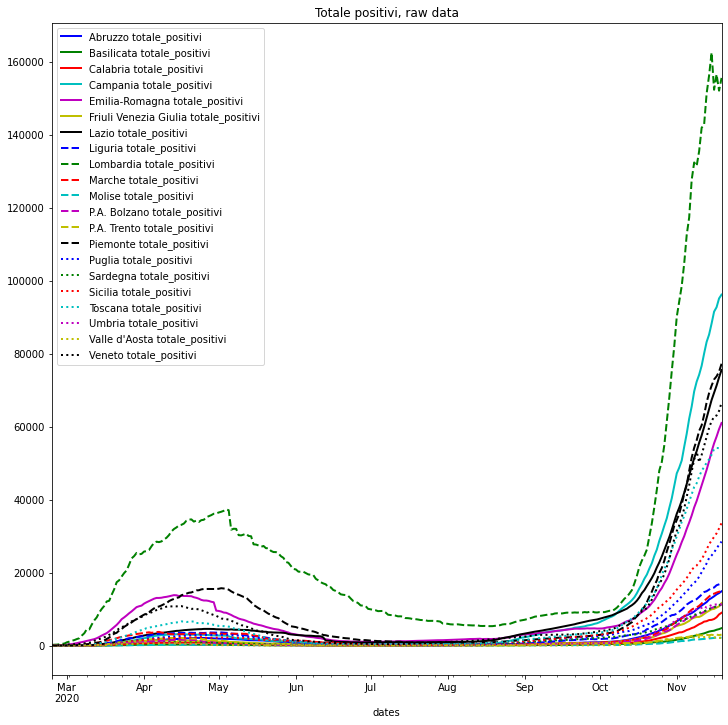

In [6]:
plt.rcParams['figure.figsize'] = [12, 12]
regional_data_totale_positivi_raw.plot.line(x='dates',
color=colors,lw=lw0,style=styles,title='Totale positivi, raw data');

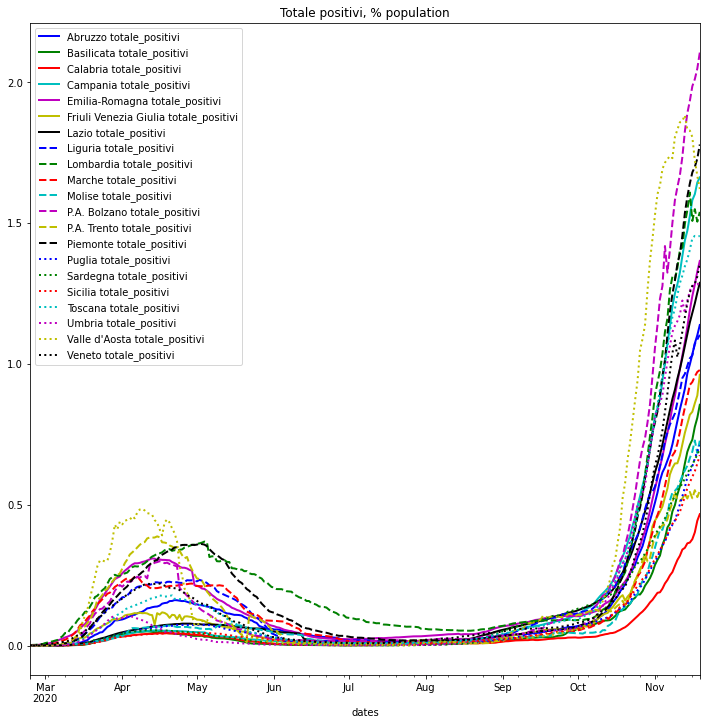

In [7]:
plt.rcParams['figure.figsize'] = [12, 12]
regional_data_totale_positivi_ratePop.plot.line(x='dates',
color=colors,lw=lw0,style=styles,title='Totale positivi, % population');

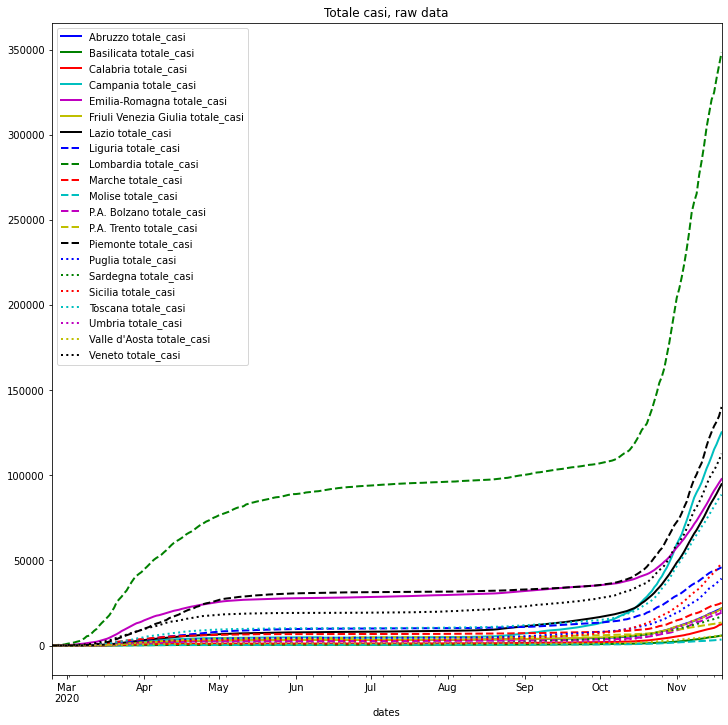

In [8]:
plt.rcParams['figure.figsize'] = [12, 12]
regional_data_totale_casi_raw.plot.line(x='dates',
color=colors,lw=lw0,style=styles,title='Totale casi, raw data');

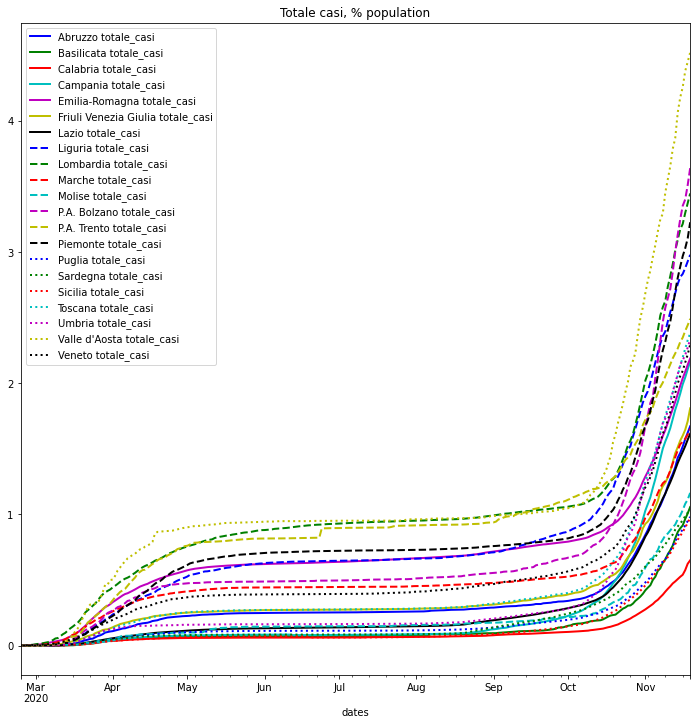

In [9]:
plt.rcParams['figure.figsize'] = [12, 12]
regional_data_totale_casi_ratePop.plot.line(x='dates',
color=colors,lw=lw0,style=styles,title='Totale casi, % population');